In [1]:
import sys
sys.path.append('../src/')

from benchmark.tools import *
from benchmark.models import Detector
from benchmark.utils import TsvHandle, run_detection

import wider_dataset
import cv2

In [2]:
train, test, validation = tfds.load('wider_dataset', split=['train', 'test', 'validation'])

data = validation.take(10)

In [3]:
class OpenCvDetector(Detector):
    def __init__(self):
        self.detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
    
    def detect(self, image):
        boxes, confidence = self.detector.detectMultiScale2(
            image, 
            scaleFactor=1.1, 
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE)

        return boxes, confidence

In [4]:
opencv = OpenCvDetector()

Running detection
Speed: 306.6127ms
Precision: 0.75
Recall: 0.375
F1 Score: 0.5
Ious: [0.6699566160520607, 0.7114774889029803, 0.7392342213310418, 0.04496781963942941]
Positives: 3, False Positives: 1, Negatives: 5


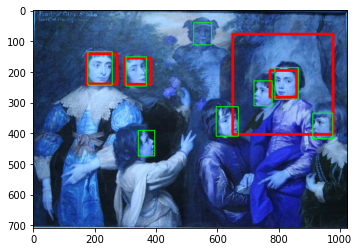

Speed: 118.6383ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: [0.0]
Positives: 0, False Positives: 1, Negatives: 1


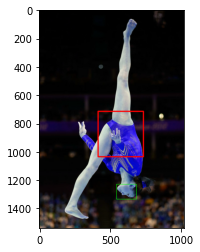

Speed: 90.695ms
Precision: 0.3333333333333333
Recall: 0.5
F1 Score: 0.4
Ious: [0.6550373798504806, 0.0, 0.0]
Positives: 1, False Positives: 2, Negatives: 1


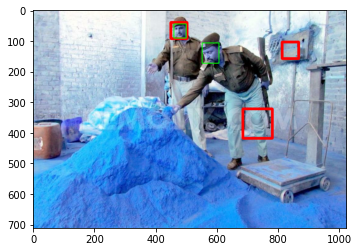

Speed: 82.8881ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 62


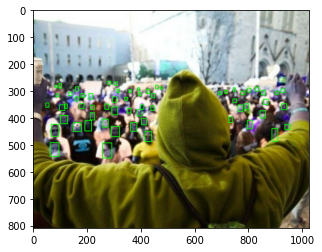

Speed: 64.8388ms
Precision: 0.8333333333333334
Recall: 0.625
F1 Score: 0.7142857142857143
Ious: [0.6420729029424681, 0.07943482963764197, 0.6260277856535299, 0.6562019082794706, 0.7884076036148333, 0.6740088105726872]
Positives: 5, False Positives: 1, Negatives: 3


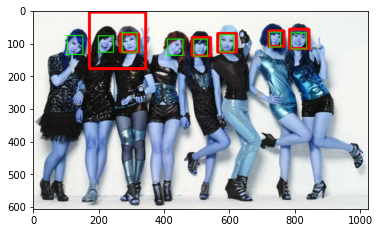

Speed: 108.1567ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 9


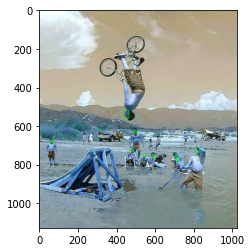

Speed: 59.0498ms
Precision: 0.5
Recall: 0.05555555555555555
F1 Score: 0.09999999999999999
Ious: [0.0, 0.5661066471877283]
Positives: 1, False Positives: 1, Negatives: 17


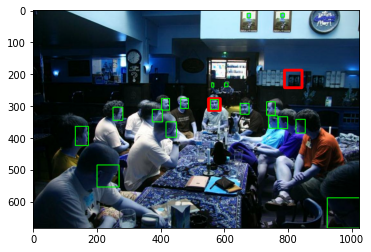

Speed: 57.9394ms
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
Ious: [0.5759376160415893, 0.633954857703631, 0.7428861788617886]
Positives: 3, False Positives: 0, Negatives: 1


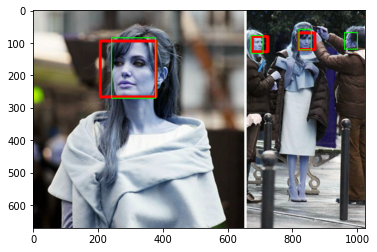

Speed: 60.9056ms
Precision: 0.5
Recall: 0.07692307692307693
F1 Score: 0.13333333333333336
Ious: [0.7, 0.6655124653739612, 0.0, 0.0]
Positives: 2, False Positives: 2, Negatives: 24


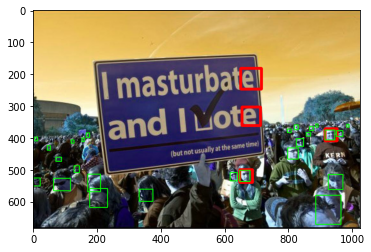

Speed: 102.292ms
Precision: 0.25
Recall: 0.3333333333333333
F1 Score: 0.28571428571428575
Ious: [0.0, 0.2883658008658009, 0.7750821631311622, 0.0]
Positives: 1, False Positives: 3, Negatives: 2


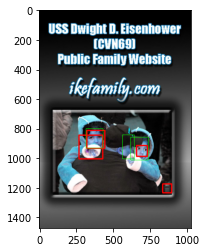

In [ ]:
with TsvHandle('opencv') as tsv:
    run_detection(tsv, data, opencv, cv2.COLOR_RGB2BGR, True, True)